# get instrument filepath

In [1]:
import yaml
try:
    from yaml import CLoader as Loader, CDumper as Dumper
except ImportError:
    from yaml import Loader, Dumper
i=0
inst_clas = 'Drums'
tracks_inst_class = []
path = f'babyslakh_16k/babyslakh_16k/Track0000{i+1}/metadata.yaml'
with open(path, 'r') as file:
   data = yaml.safe_load(file)
for key in data['stems'].keys():
    if data['stems'][key]['inst_class'] == inst_clas:
        tracks_inst_class.append(key)

tracks_inst_class

['S01']

In [2]:
wav_paths_inst_class = [f'babyslakh_16k/babyslakh_16k/Track0000{i+1}/stems/{track}.wav' for track in tracks_inst_class]

In [3]:
wav_path = f'babyslakh_16k/babyslakh_16k/Track0000{i+1}/mix.wav'

# Make a loop for creating images inside the file

In [4]:
from wav_to_spectrogram_utils import wav_to_stft, get_windows
import os, cv2, librosa
import time, yaml
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (20,15)


start_time = time.time()
inst_clas = 'Drums'

for i in range(20):
    print(i)
    tracks_inst_class = []
    if i < 9:
        path = f'babyslakh_16k/babyslakh_16k/Track0000{i+1}/metadata.yaml'
    else:
        path = f'babyslakh_16k/babyslakh_16k/Track000{i+1}/metadata.yaml'
    with open(path, 'r') as file:
       data = yaml.safe_load(file)
    for key in data['stems'].keys():
        if data['stems'][key]['inst_class'] == inst_clas:
            tracks_inst_class.append(key)
    wav_paths_inst_class = [path[:-13] +f'stems/{track}.wav' for track in tracks_inst_class]
    wav_path = path[:-13]+'mix.wav'
    for path_ in wav_paths_inst_class:
        Intensity_Stft, Angle_Stft, n, sr = wav_to_stft(path_)
        Intensity_Stft = librosa.amplitude_to_db(Intensity_Stft, ref=0)
        windows = get_windows(Intensity_Stft, 64, 128)
        os.makedirs(path_[:-13]+f'Spectrograms/{inst_clas}_windows/', exist_ok=True)
        for k, window in enumerate(windows):
            # print(path_[:-4]+f'_{inst_clas}_windows/{k}.jpg')
            if os.path.isfile(path_[:-13]+f'Spectrograms/{inst_clas}_windows/{k}.jpg'):
                os.remove(path_[:-13]+f'Spectrograms/{inst_clas}_windows/{k}.jpg')
            cv2.imwrite(path_[:-13]+f'Spectrograms/{inst_clas}_windows/{k}.jpg', window)
            
    Intensity_Stft, Angle_Stft, n, sr = wav_to_stft(wav_path)
    Intensity_Stft = librosa.amplitude_to_db(Intensity_Stft, ref=0)
    windows = get_windows(Intensity_Stft, 64, 128)
    os.makedirs(path[:-13]+f'Spectrograms/mix_windows/', exist_ok=True)
    for k, window in enumerate(windows):
        if os.path.isfile(path[:-13]+f'Spectrograms/mix_windows/{k}.jpg'):
            os.remove(path[:-13]+f'Spectrograms/mix_windows/{k}.jpg')
        cv2.imwrite(path[:-13]+f'Spectrograms/mix_windows/{k}.jpg', window)
        
    print(len(windows), f'time = {time.time() - start_time}')
    print((time.time() - start_time)/len(windows))
    start_time = time.time()
            
        
        

ModuleNotFoundError: No module named 'librosa'

# création du jeu de donnée

2024-01-14 19:06:29.073604: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-14 19:06:30.169199: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-14 19:06:30.169268: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-14 19:06:30.401289: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-14 19:06:30.847139: I tensorflow/core/platform/cpu_feature_guar

Found 325 files belonging to 1 classes.


2024-01-14 19:06:37.672497: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-14 19:06:38.014061: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-14 19:06:38.014121: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-14 19:06:38.022304: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-14 19:06:38.022358: I external/local_xla/xla/stream_executor

Found 325 files belonging to 1 classes.
Found 256 files belonging to 1 classes.
Found 256 files belonging to 1 classes.
Found 294 files belonging to 1 classes.
Found 294 files belonging to 1 classes.
Found 313 files belonging to 1 classes.
Found 313 files belonging to 1 classes.
Found 332 files belonging to 1 classes.
Found 332 files belonging to 1 classes.
Found 331 files belonging to 1 classes.
Found 331 files belonging to 1 classes.
Found 332 files belonging to 1 classes.
Found 332 files belonging to 1 classes.
Found 349 files belonging to 1 classes.
Found 349 files belonging to 1 classes.
Found 216 files belonging to 1 classes.
Found 216 files belonging to 1 classes.
Found 244 files belonging to 1 classes.
Found 244 files belonging to 1 classes.
Found 266 files belonging to 1 classes.
Found 266 files belonging to 1 classes.
Found 414 files belonging to 1 classes.
Found 414 files belonging to 1 classes.
Found 299 files belonging to 1 classes.
Found 299 files belonging to 1 classes.


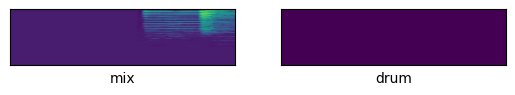

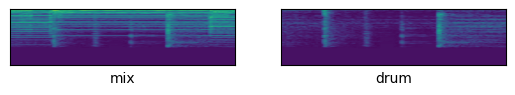

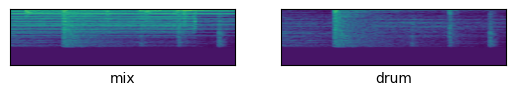

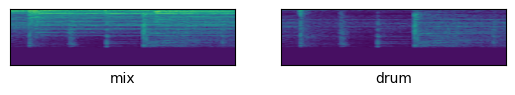

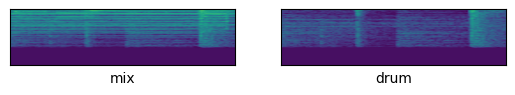

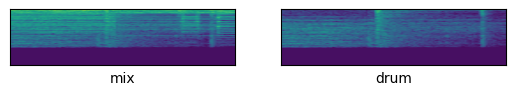

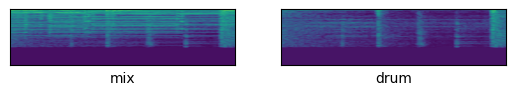

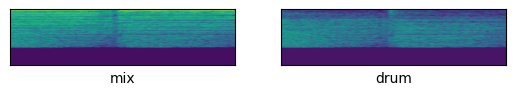

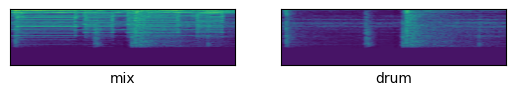

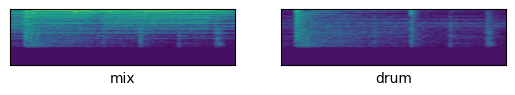

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
for i in range(15):
    if i < 9:
        directory = f'babyslakh_16k/babyslakh_16k/Track0000{i+1}/Spectrograms/'
    else:
        directory = f'babyslakh_16k/babyslakh_16k/Track000{i+1}/Spectrograms/'
    if i == 0:
        all_dataset_X = keras.preprocessing.image_dataset_from_directory(directory+'mix_windows/',
                                                                        labels=None,
                                                                        color_mode= "grayscale",
                                                                        image_size=(128, 512), shuffle = False, batch_size = 8)
        all_dataset_y = keras.preprocessing.image_dataset_from_directory(directory+'Drums_windows/',
                                                                    labels=None,
                                                                    color_mode= "grayscale",
                                                                    image_size=(128, 512), shuffle = False, batch_size = 8)
    else:
        all_dataset_X = all_dataset_X.concatenate(keras.preprocessing.image_dataset_from_directory(directory+'mix_windows/',
                                                                                                        labels=None,
                                                                                                        color_mode= "grayscale",
                                                                                                        image_size=(128, 512), shuffle = False, batch_size = 8))
        all_dataset_y = all_dataset_y.concatenate(keras.preprocessing.image_dataset_from_directory(directory+'Drums_windows/',
                                                                    labels=None,
                                                                    color_mode= "grayscale",
                                                                    image_size=(128, 512), shuffle = False, batch_size = 8))

count = 0
nbr_imgs = 10
for image_mix, image_drum in zip(all_dataset_X,all_dataset_y):
    if count == nbr_imgs:
        break
    plt.subplot(1,2,1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_mix[0].numpy().reshape((128, 512, 1)))
    plt.xlabel('mix')

    
    plt.subplot(1,2,2)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_drum[0].numpy().reshape((128, 512, 1)))
    plt.xlabel('drum')

    plt.show()
    count+=1

    

In [2]:
DATASET_SIZE = all_dataset_X.cardinality().numpy()
train_size = int(0.7 * DATASET_SIZE)
val_size = int(0.15 * DATASET_SIZE)

train_ds_X = all_dataset_X.take(train_size)    
val_ds_X = all_dataset_X.skip(train_size).take(val_size)
train_ds_y = all_dataset_y.take(train_size)    
val_ds_y = all_dataset_y.skip(train_size).take(val_size)

train_ds_X, train_ds_y = train_ds_X.shuffle(buffer_size=2, seed=2), train_ds_y.shuffle(buffer_size=2, seed=2)
X = tf.data.Dataset.zip((train_ds_X, train_ds_y))
X_val = tf.data.Dataset.zip((val_ds_X, val_ds_y))

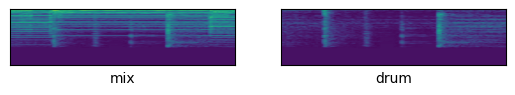

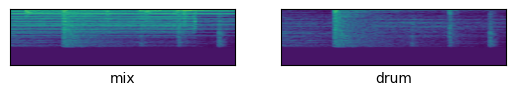

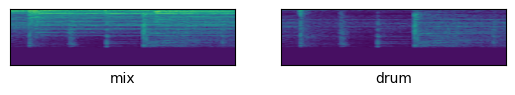

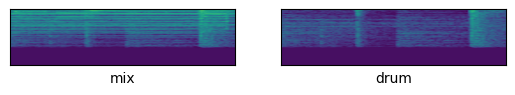

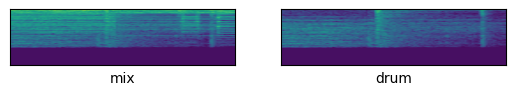

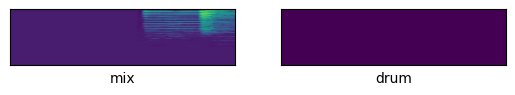

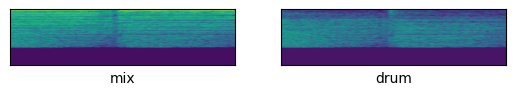

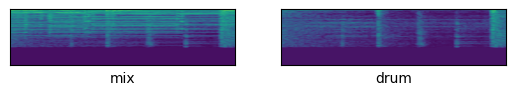

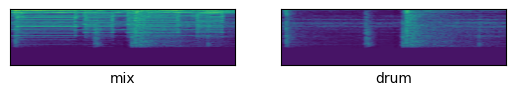

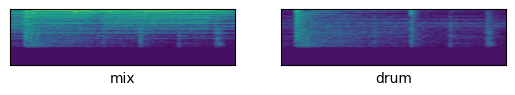

In [4]:
count = 0
for image_mix, image_drum in X:
    if count == nbr_imgs:
        break
    plt.subplot(1,2,1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_mix[0].numpy().reshape((128, 512, 1)))
    plt.xlabel('mix')

    
    plt.subplot(1,2,2)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_drum[0].numpy().reshape((128, 512, 1)))
    plt.xlabel('drum')

    plt.show()
    count+=1

# Entrainnement

In [5]:
%load_ext autoreload
%autoreload 2
from Unet_Model import build_unet_model

unet_model = build_unet_model()

In [6]:
unet_model.compile(
    optimizer="adam",
    loss=tf.keras.metrics.mean_absolute_error)

In [7]:
history = unet_model.fit(
    X,
    epochs=100,
    verbose=2,
    batch_size = 8,
    validation_data=X_val)


Epoch 1/100


2024-01-14 19:07:47.937413: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inU-Net/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-01-14 19:07:48.908177: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8905
2024-01-14 19:08:12.444568: I external/local_xla/xla/service/service.cc:168] XLA service 0x5643e7fe0140 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-14 19:08:12.444662: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-01-14 19:08:12.547109: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1705255692.889390   22649 device_compiler.h:186] Compiled cluster us

413/413 - 202s - loss: 12.1906 - val_loss: 5.8490 - 202s/epoch - 490ms/step
Epoch 2/100


2024-01-14 19:11:20.705836: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:11:20.716954: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:11:21.381996: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 17s - loss: 5.9915 - val_loss: 4.8979 - 17s/epoch - 42ms/step
Epoch 3/100


2024-01-14 19:11:31.230188: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:11:31.238936: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:11:32.303110: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 12s - loss: 5.1039 - val_loss: 4.4934 - 12s/epoch - 28ms/step
Epoch 4/100


2024-01-14 19:11:40.563456: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:11:40.572377: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:11:41.566107: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 4.5522 - val_loss: 4.3063 - 11s/epoch - 28ms/step
Epoch 5/100


2024-01-14 19:11:54.083174: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:11:54.093036: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:11:55.179477: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 4.4051 - val_loss: 4.3861 - 11s/epoch - 28ms/step
Epoch 6/100


2024-01-14 19:12:02.474048: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:12:02.489808: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:12:03.487922: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 4.2434 - val_loss: 4.1992 - 11s/epoch - 28ms/step
Epoch 7/100


2024-01-14 19:12:17.010636: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:12:18.087308: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:12:18.095649: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 4.1111 - val_loss: 4.4631 - 11s/epoch - 28ms/step
Epoch 8/100


2024-01-14 19:12:27.514661: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:12:28.533125: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:12:28.540600: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 3.9925 - val_loss: 4.2357 - 11s/epoch - 28ms/step
Epoch 9/100


2024-01-14 19:12:38.930051: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:12:38.936992: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:12:39.937689: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097664 bytes after encountering the first element of size 2097664 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 3.9401 - val_loss: 3.9062 - 11s/epoch - 28ms/step
Epoch 10/100


2024-01-14 19:12:50.344620: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:12:51.361351: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:12:51.368624: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 3.5750 - val_loss: 3.1624 - 11s/epoch - 28ms/step
Epoch 11/100


2024-01-14 19:13:02.790930: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:13:03.871548: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:13:03.879896: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 3.4652 - val_loss: 4.7199 - 11s/epoch - 28ms/step
Epoch 12/100


2024-01-14 19:13:14.246093: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:13:15.292459: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:13:15.299027: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 3.3864 - val_loss: 5.3705 - 11s/epoch - 28ms/step
Epoch 13/100


2024-01-14 19:13:25.646223: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:13:26.718153: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:13:26.725237: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 3.4617 - val_loss: 4.5052 - 11s/epoch - 28ms/step
Epoch 14/100


2024-01-14 19:13:37.040480: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097408 bytes after encountering the first element of size 2097408 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:13:37.055540: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:13:38.113407: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 3.4220 - val_loss: 4.3201 - 11s/epoch - 28ms/step
Epoch 15/100


2024-01-14 19:13:47.452294: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:13:48.477246: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:13:48.485693: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 3.3759 - val_loss: 3.6852 - 11s/epoch - 28ms/step
Epoch 16/100


2024-01-14 19:13:57.885922: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:13:58.866987: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:13:58.873115: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 3.2421 - val_loss: 3.5265 - 11s/epoch - 28ms/step
Epoch 17/100


2024-01-14 19:14:11.355041: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:14:12.435667: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:14:12.442876: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 3.1721 - val_loss: 3.3747 - 11s/epoch - 28ms/step
Epoch 18/100


2024-01-14 19:14:21.709802: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:14:22.751522: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:14:22.762008: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 3.1456 - val_loss: 4.7503 - 11s/epoch - 28ms/step
Epoch 19/100


2024-01-14 19:14:33.154311: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:14:33.161427: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:14:34.188549: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 3.1818 - val_loss: 3.2680 - 11s/epoch - 28ms/step
Epoch 20/100


2024-01-14 19:14:43.617833: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:14:44.637793: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:14:44.646106: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 3.1035 - val_loss: 5.1835 - 11s/epoch - 28ms/step
Epoch 21/100


2024-01-14 19:14:55.123775: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:14:56.165944: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:14:56.172663: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 3.0222 - val_loss: 4.9567 - 11s/epoch - 28ms/step
Epoch 22/100


2024-01-14 19:15:05.555188: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:15:06.539631: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:15:06.545964: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 3.2136 - val_loss: 4.2364 - 11s/epoch - 28ms/step
Epoch 23/100


2024-01-14 19:15:19.055554: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:15:20.070178: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:15:20.077035: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 3.1006 - val_loss: 4.8002 - 11s/epoch - 28ms/step
Epoch 24/100


2024-01-14 19:15:31.484018: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:15:31.491162: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:15:32.561452: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 3.1018 - val_loss: 4.3737 - 11s/epoch - 28ms/step
Epoch 25/100


2024-01-14 19:15:40.881618: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:15:41.867493: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:15:41.876769: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 3.0501 - val_loss: 3.0355 - 11s/epoch - 28ms/step
Epoch 26/100


2024-01-14 19:15:53.297146: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:15:54.355510: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:15:54.368983: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.9884 - val_loss: 3.1678 - 11s/epoch - 28ms/step
Epoch 27/100


2024-01-14 19:16:04.733484: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:16:04.741178: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:16:05.727674: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.9293 - val_loss: 4.5079 - 11s/epoch - 28ms/step
Epoch 28/100


2024-01-14 19:16:15.057379: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:16:16.081127: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:16:16.088986: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.8851 - val_loss: 3.1409 - 11s/epoch - 28ms/step
Epoch 29/100


2024-01-14 19:16:26.447569: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:16:27.454221: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:16:27.461039: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.8861 - val_loss: 3.0395 - 11s/epoch - 28ms/step
Epoch 30/100


2024-01-14 19:16:38.855598: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:16:39.859639: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:16:39.872801: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 12s - loss: 2.8220 - val_loss: 3.2124 - 12s/epoch - 29ms/step
Epoch 31/100


2024-01-14 19:16:50.920067: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:16:51.946100: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:16:51.953467: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 12s - loss: 2.7656 - val_loss: 4.9392 - 12s/epoch - 28ms/step
Epoch 32/100


2024-01-14 19:17:02.406400: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:17:03.417423: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:17:03.423967: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.8740 - val_loss: 3.0274 - 11s/epoch - 28ms/step
Epoch 33/100


2024-01-14 19:17:13.781353: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:17:13.787898: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:17:14.794518: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 12s - loss: 2.7425 - val_loss: 4.2028 - 12s/epoch - 29ms/step
Epoch 34/100


2024-01-14 19:17:25.726775: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 3145728 bytes after encountering the first element of size 3145728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:17:25.740352: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:17:26.994191: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 13s - loss: 2.6844 - val_loss: 4.1496 - 13s/epoch - 32ms/step
Epoch 35/100


2024-01-14 19:17:40.855146: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:17:40.865706: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:17:42.003608: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 13s - loss: 2.6703 - val_loss: 5.1396 - 13s/epoch - 30ms/step
Epoch 36/100


2024-01-14 19:17:51.258927: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:17:52.354300: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:17:52.362901: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 12s - loss: 2.6202 - val_loss: 4.2987 - 12s/epoch - 30ms/step
Epoch 37/100


2024-01-14 19:18:04.496509: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:18:04.504288: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:18:05.540286: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 12s - loss: 2.6142 - val_loss: 4.3422 - 12s/epoch - 29ms/step
Epoch 38/100


2024-01-14 19:18:16.415461: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:18:16.423877: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:18:17.452018: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 12s - loss: 2.6053 - val_loss: 2.9782 - 12s/epoch - 28ms/step
Epoch 39/100


2024-01-14 19:18:27.066655: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:18:27.076062: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:18:28.163573: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 12s - loss: 2.5585 - val_loss: 2.8613 - 12s/epoch - 28ms/step
Epoch 40/100


2024-01-14 19:18:39.585449: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:18:40.585945: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:18:40.593062: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.5476 - val_loss: 2.9821 - 11s/epoch - 28ms/step
Epoch 41/100


2024-01-14 19:18:53.126238: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:18:53.135361: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:18:53.780788: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.5230 - val_loss: 2.9017 - 11s/epoch - 28ms/step
Epoch 42/100


2024-01-14 19:19:04.593466: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:19:04.601022: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:19:05.260318: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.5107 - val_loss: 3.9170 - 11s/epoch - 28ms/step
Epoch 43/100


2024-01-14 19:19:13.925276: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:19:13.938958: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:19:14.933754: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.4627 - val_loss: 2.7457 - 11s/epoch - 28ms/step
Epoch 44/100


2024-01-14 19:19:25.299439: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:19:26.309733: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:19:26.317319: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.4781 - val_loss: 4.1158 - 11s/epoch - 28ms/step
Epoch 45/100


2024-01-14 19:19:37.776130: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:19:37.783231: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:19:38.853181: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.4868 - val_loss: 2.6355 - 11s/epoch - 28ms/step
Epoch 46/100


2024-01-14 19:19:48.134033: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:19:48.147712: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:19:49.174164: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.4382 - val_loss: 4.1539 - 11s/epoch - 28ms/step
Epoch 47/100


2024-01-14 19:19:58.530965: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:19:59.550130: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:19:59.558628: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.4013 - val_loss: 2.7781 - 11s/epoch - 28ms/step
Epoch 48/100


2024-01-14 19:20:12.074769: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:20:13.129977: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:20:13.137738: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.3751 - val_loss: 2.7675 - 11s/epoch - 28ms/step
Epoch 49/100


2024-01-14 19:20:23.474206: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:20:24.545646: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:20:24.554668: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 12s - loss: 2.3690 - val_loss: 4.1935 - 12s/epoch - 28ms/step
Epoch 50/100


2024-01-14 19:20:31.914059: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:20:32.927036: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:20:32.934711: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 12s - loss: 2.3809 - val_loss: 3.9305 - 12s/epoch - 28ms/step
Epoch 51/100


2024-01-14 19:20:44.514503: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:20:45.529480: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:20:45.536882: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.3804 - val_loss: 4.3841 - 11s/epoch - 28ms/step
Epoch 52/100


2024-01-14 19:20:56.931351: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:20:57.963279: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:20:57.970802: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.3683 - val_loss: 4.1240 - 11s/epoch - 28ms/step
Epoch 53/100


2024-01-14 19:21:08.375086: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:21:09.373855: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:21:09.381751: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.3452 - val_loss: 2.6618 - 11s/epoch - 28ms/step
Epoch 54/100


2024-01-14 19:21:21.849230: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:21:21.858539: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:21:22.529273: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.3645 - val_loss: 4.3389 - 11s/epoch - 28ms/step
Epoch 55/100


2024-01-14 19:21:33.253639: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:21:33.262747: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:21:33.904589: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.3896 - val_loss: 2.6775 - 11s/epoch - 28ms/step
Epoch 56/100


2024-01-14 19:21:44.658721: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097664 bytes after encountering the first element of size 2097664 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:21:44.667343: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:21:45.313727: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.3534 - val_loss: 2.6685 - 11s/epoch - 28ms/step
Epoch 57/100


2024-01-14 19:21:55.040631: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:21:55.049236: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:21:56.114539: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.3127 - val_loss: 2.6839 - 11s/epoch - 28ms/step
Epoch 58/100


2024-01-14 19:22:06.440167: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:22:07.494241: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:22:07.501119: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.2954 - val_loss: 4.1962 - 11s/epoch - 28ms/step
Epoch 59/100


2024-01-14 19:22:15.952190: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:22:16.974435: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:22:16.980647: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 12s - loss: 2.2708 - val_loss: 4.1551 - 12s/epoch - 28ms/step
Epoch 60/100


2024-01-14 19:22:29.450554: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:22:29.460647: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:22:30.514392: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.2656 - val_loss: 4.0720 - 11s/epoch - 28ms/step
Epoch 61/100


2024-01-14 19:22:39.850155: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:22:40.830550: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:22:40.838904: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 12s - loss: 2.2529 - val_loss: 2.6442 - 12s/epoch - 28ms/step
Epoch 62/100


2024-01-14 19:22:52.742737: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:22:52.750338: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:22:53.827424: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 12s - loss: 2.2759 - val_loss: 4.0782 - 12s/epoch - 28ms/step
Epoch 63/100


2024-01-14 19:23:02.137454: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:23:03.135858: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:23:03.141975: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.2205 - val_loss: 4.0993 - 11s/epoch - 28ms/step
Epoch 64/100


2024-01-14 19:23:15.599824: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:23:17.064209: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:23:17.072588: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 12s - loss: 2.3031 - val_loss: 3.0239 - 12s/epoch - 29ms/step
Epoch 65/100


2024-01-14 19:23:27.809560: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:23:28.862787: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:23:28.869335: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 12s - loss: 2.2986 - val_loss: 4.5451 - 12s/epoch - 28ms/step
Epoch 66/100


2024-01-14 19:23:38.199131: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:23:39.216121: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:23:39.223706: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 3145728 bytes after encountering the first element of size 3145728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.2442 - val_loss: 2.5327 - 11s/epoch - 28ms/step
Epoch 67/100


2024-01-14 19:23:50.665940: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:23:51.712278: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:23:51.719469: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.2262 - val_loss: 4.0898 - 11s/epoch - 28ms/step
Epoch 68/100


2024-01-14 19:24:02.054134: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:24:03.106707: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097408 bytes after encountering the first element of size 2097408 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:24:03.113219: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.2103 - val_loss: 2.5488 - 11s/epoch - 28ms/step
Epoch 69/100


2024-01-14 19:24:13.449293: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:24:14.508785: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:24:14.515429: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.2122 - val_loss: 2.5126 - 11s/epoch - 28ms/step
Epoch 70/100


2024-01-14 19:24:23.814053: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:24:23.819456: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:24:24.793726: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.2899 - val_loss: 2.6168 - 11s/epoch - 27ms/step
Epoch 71/100


2024-01-14 19:24:34.146049: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:24:34.151752: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:24:35.141798: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.2337 - val_loss: 2.5766 - 11s/epoch - 28ms/step
Epoch 72/100


2024-01-14 19:24:46.553376: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:24:46.560587: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:24:47.583144: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.1938 - val_loss: 2.5671 - 11s/epoch - 28ms/step
Epoch 73/100


2024-01-14 19:24:57.944303: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:24:57.951188: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:24:58.959206: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.1692 - val_loss: 4.3442 - 11s/epoch - 28ms/step
Epoch 74/100


2024-01-14 19:25:09.319923: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:25:09.335194: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:25:10.321043: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.1855 - val_loss: 4.4185 - 11s/epoch - 28ms/step
Epoch 75/100


2024-01-14 19:25:21.793106: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:25:21.801513: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:25:22.855226: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.1923 - val_loss: 3.8719 - 11s/epoch - 28ms/step
Epoch 76/100


2024-01-14 19:25:32.108911: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:25:33.121200: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 3145728 bytes after encountering the first element of size 3145728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:25:33.129255: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.1487 - val_loss: 3.8894 - 11s/epoch - 27ms/step
Epoch 77/100


2024-01-14 19:25:42.425028: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:25:42.431702: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:25:43.437262: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.1396 - val_loss: 4.0786 - 11s/epoch - 27ms/step
Epoch 78/100


2024-01-14 19:25:54.836604: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:25:55.855695: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:25:55.863378: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.1369 - val_loss: 2.5120 - 11s/epoch - 28ms/step
Epoch 79/100


2024-01-14 19:26:07.299117: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:26:07.305971: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:26:08.358621: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.1364 - val_loss: 3.8820 - 11s/epoch - 28ms/step
Epoch 80/100


2024-01-14 19:26:18.697946: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:26:19.746024: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:26:19.755098: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.1627 - val_loss: 3.6644 - 11s/epoch - 28ms/step
Epoch 81/100


2024-01-14 19:26:29.052513: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:26:29.059693: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:26:30.098409: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.1975 - val_loss: 2.4893 - 11s/epoch - 28ms/step
Epoch 82/100


2024-01-14 19:26:40.450228: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:26:40.457649: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:26:41.467584: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.1159 - val_loss: 2.5703 - 11s/epoch - 28ms/step
Epoch 83/100


2024-01-14 19:26:50.859664: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:26:50.867391: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:26:51.869376: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.1132 - val_loss: 2.5018 - 11s/epoch - 28ms/step
Epoch 84/100


2024-01-14 19:27:02.308179: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:27:03.319819: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:27:03.326228: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.0953 - val_loss: 2.4912 - 11s/epoch - 28ms/step
Epoch 85/100


2024-01-14 19:27:15.660238: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:27:15.670931: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:27:16.725671: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.1104 - val_loss: 3.7910 - 11s/epoch - 27ms/step
Epoch 86/100


2024-01-14 19:27:27.099539: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:27:27.106230: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:27:28.160591: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.1111 - val_loss: 2.5021 - 11s/epoch - 28ms/step
Epoch 87/100


2024-01-14 19:27:37.494829: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:27:38.520578: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:27:38.528572: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.0963 - val_loss: 2.4374 - 11s/epoch - 28ms/step
Epoch 88/100


2024-01-14 19:27:48.912486: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:27:49.927357: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:27:49.934605: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.1004 - val_loss: 2.5222 - 11s/epoch - 28ms/step
Epoch 89/100


2024-01-14 19:28:01.368282: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:28:01.375026: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:28:02.457375: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.1149 - val_loss: 4.5183 - 11s/epoch - 28ms/step
Epoch 90/100


2024-01-14 19:28:12.797566: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:28:12.806610: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:28:13.853887: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.1105 - val_loss: 2.4882 - 11s/epoch - 28ms/step
Epoch 91/100


2024-01-14 19:28:23.123945: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:28:24.129373: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:28:24.136216: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.1191 - val_loss: 3.6714 - 11s/epoch - 28ms/step
Epoch 92/100


2024-01-14 19:28:35.621686: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:28:36.668869: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:28:36.675773: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.1290 - val_loss: 4.2374 - 11s/epoch - 28ms/step
Epoch 93/100


2024-01-14 19:28:47.121386: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:28:48.181921: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:28:48.190739: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.0739 - val_loss: 3.8911 - 11s/epoch - 28ms/step
Epoch 94/100


2024-01-14 19:28:57.483277: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:28:58.496583: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:28:58.504966: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.0842 - val_loss: 2.4386 - 11s/epoch - 27ms/step
Epoch 95/100


2024-01-14 19:29:06.834582: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:29:07.832242: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:29:07.840034: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.0548 - val_loss: 2.4360 - 11s/epoch - 28ms/step
Epoch 96/100


2024-01-14 19:29:20.393488: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:29:21.415966: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:29:21.422930: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.0737 - val_loss: 2.4657 - 11s/epoch - 28ms/step
Epoch 97/100


2024-01-14 19:29:31.827916: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:29:31.834046: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:29:32.856510: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.0664 - val_loss: 2.4638 - 11s/epoch - 28ms/step
Epoch 98/100


2024-01-14 19:29:44.264261: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:29:44.272581: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:29:45.328479: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.0509 - val_loss: 2.4810 - 11s/epoch - 28ms/step
Epoch 99/100


2024-01-14 19:29:54.663081: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:29:55.671554: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:29:55.678493: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.0395 - val_loss: 2.4321 - 11s/epoch - 28ms/step
Epoch 100/100


2024-01-14 19:30:06.125020: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:30:07.146270: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-01-14 19:30:07.155490: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2097152 bytes after encountering the first element of size 2097152 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or 

413/413 - 11s - loss: 2.0387 - val_loss: 2.4469 - 11s/epoch - 28ms/step


In [8]:
unet_model.save('unet.keras')

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
unet_model = keras.models.load_model('unet.keras')

2024-01-15 22:47:01.650198: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-15 22:47:02.278304: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-15 22:47:02.278351: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-15 22:47:02.393519: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-15 22:47:02.682791: I tensorflow/core/platform/cpu_feature_guar

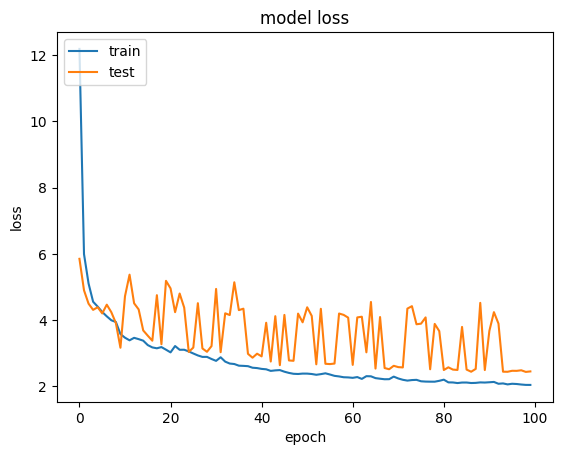

In [9]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# test inference

In [2]:
directory = f'babyslakh_16k/babyslakh_16k/Track000{16}/Spectrograms/'
test_X = keras.preprocessing.image_dataset_from_directory(directory+'mix_windows/',
                                                                labels=None,
                                                                color_mode= "grayscale",
                                                        image_size=(128, 512), shuffle = False, batch_size = 1)
file_path = test_X.file_paths
file_path

Found 272 files belonging to 1 classes.


['babyslakh_16k/babyslakh_16k/Track00016/Spectrograms/mix_windows/0.jpg',
 'babyslakh_16k/babyslakh_16k/Track00016/Spectrograms/mix_windows/1.jpg',
 'babyslakh_16k/babyslakh_16k/Track00016/Spectrograms/mix_windows/10.jpg',
 'babyslakh_16k/babyslakh_16k/Track00016/Spectrograms/mix_windows/100.jpg',
 'babyslakh_16k/babyslakh_16k/Track00016/Spectrograms/mix_windows/101.jpg',
 'babyslakh_16k/babyslakh_16k/Track00016/Spectrograms/mix_windows/102.jpg',
 'babyslakh_16k/babyslakh_16k/Track00016/Spectrograms/mix_windows/103.jpg',
 'babyslakh_16k/babyslakh_16k/Track00016/Spectrograms/mix_windows/104.jpg',
 'babyslakh_16k/babyslakh_16k/Track00016/Spectrograms/mix_windows/105.jpg',
 'babyslakh_16k/babyslakh_16k/Track00016/Spectrograms/mix_windows/106.jpg',
 'babyslakh_16k/babyslakh_16k/Track00016/Spectrograms/mix_windows/107.jpg',
 'babyslakh_16k/babyslakh_16k/Track00016/Spectrograms/mix_windows/108.jpg',
 'babyslakh_16k/babyslakh_16k/Track00016/Spectrograms/mix_windows/109.jpg',
 'babyslakh_16k/b

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os, cv2, numpy as np
for i in range(15,20):
    if i < 9:
        directory = f'babyslakh_16k/babyslakh_16k/Track0000{i+1}/Spectrograms/'
    else:
        directory = f'babyslakh_16k/babyslakh_16k/Track000{i+1}/Spectrograms/'
    test_X = keras.preprocessing.image_dataset_from_directory(directory+'mix_windows/',
                                                                    labels=None,
                                                                    color_mode= "grayscale",
                                                            image_size=(128, 512), shuffle = False, batch_size = 1)
    k=0
    for images in test_X:
        y_test = unet_model.predict(images)
    
       
        for image in y_test:
            print(image.shape)
            os.makedirs(directory[:-13]+f'Spectrograms/Drums_predict_windows/', exist_ok=True)
            file_path = test_X.file_paths[k]
            filename = file_path.split('/')[-1]
            if os.path.isfile(directory[:-13]+f'Spectrograms/Drums_predict_windows/{filename}'):
                os.remove(directory[:-13]+f'Spectrograms/Drums_predict_windows/{filename}')
            cv2.imwrite(directory[:-13]+f'Spectrograms/Drums_predict_windows/{filename}', image)
            k+=1
        
    

Found 272 files belonging to 1 classes.
1/1 [==============================] - 0s 21ms/step
(128, 512, 1)
1/1 [==============================] - 0s 19ms/step
(128, 512, 1)
1/1 [==============================] - 0s 21ms/step
(128, 512, 1)
1/1 [==============================] - 0s 19ms/step
(128, 512, 1)
1/1 [==============================] - 0s 21ms/step
(128, 512, 1)
1/1 [==============================] - 0s 20ms/step
(128, 512, 1)
1/1 [==============================] - 0s 18ms/step
(128, 512, 1)
1/1 [==============================] - 0s 21ms/step
(128, 512, 1)
1/1 [==============================] - 0s 17ms/step
(128, 512, 1)
1/1 [==============================] - 0s 18ms/step
(128, 512, 1)
1/1 [==============================] - 0s 18ms/step
(128, 512, 1)
1/1 [==============================] - 0s 19ms/step
(128, 512, 1)
1/1 [==============================] - 0s 20ms/step
(128, 512, 1)
1/1 [==============================] - 0s 18ms/step
(128, 512, 1)
1/1 [==============================]

0 (512, 256)
1 (256, 128)
2 (128, 64)
3 (64, 32)
4 (32, 16)
5 (16, 1)
